3월 12일 과제 요약

* 회귀(Regression):
    * load_boston() 함수로 데이터 셋을 로드
    * LineareRegression, Ridge, Lasso, ElasticNet 클래스 사용
    * 각 모델의 성능 비교
    * 하이퍼파라미터 튜닝(degrees, alpha, r)
* 분류(Classification):
    * load_breast_cancer() 함수로 데이터 셋을 로드
    * KNeighborsClassifier, LogisticRegression, SGDClassifier, DecisionTreeClassifier 클래스 사용
    * 각 모델의 성능 비교

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

---

# 1. Boston 주택 수치 예측

## Data Import

In [361]:
boston = load_boston()

In [362]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [363]:
X = boston['data']
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [364]:
X.shape

(506, 13)

In [365]:
y = boston['target']
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [366]:
y.shape

(506,)

In [367]:
df = pd.DataFrame(data=X, columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [368]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


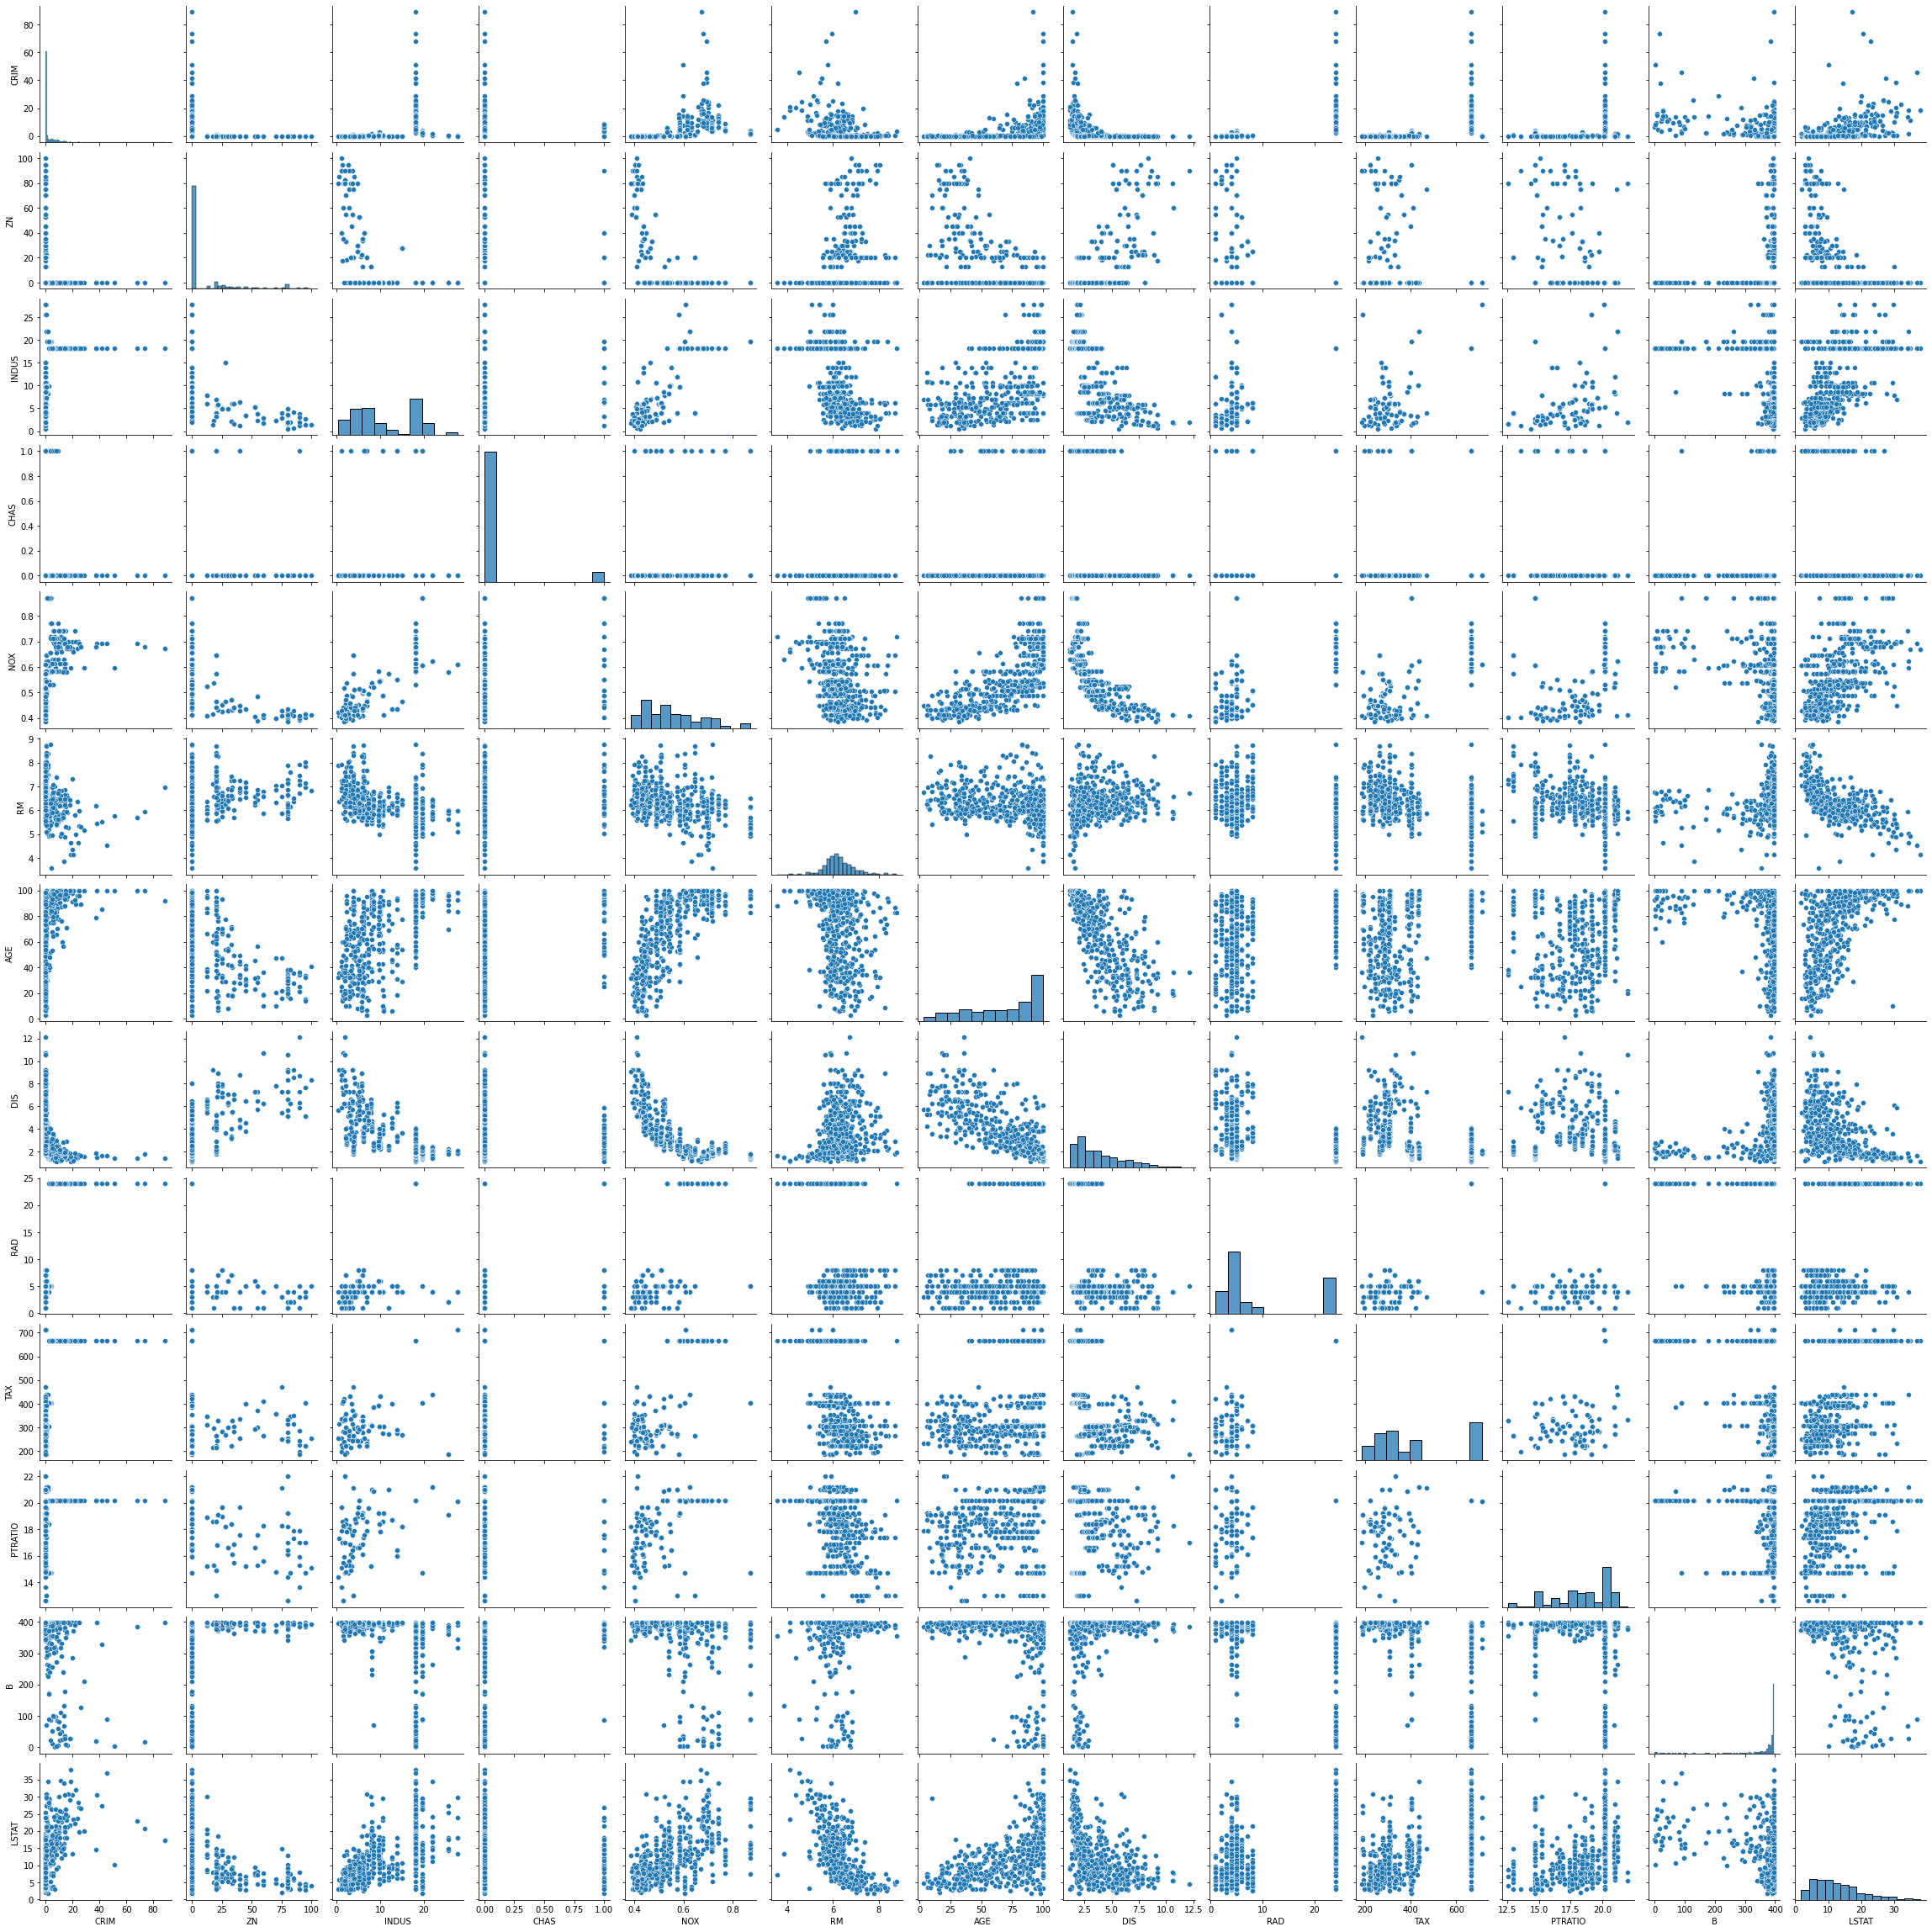

In [369]:
sns.pairplot(data=df)
plt.show()

In [370]:
df.items

<bound method DataFrame.items of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 r

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [372]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

## Linear Regression 

degree=2 LinearRegression()

In [373]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
regressor = LinearRegression()

model = Pipeline([('poly', poly_features),
                  ('scaler', std_scaler),
                  ('reg', regressor)])

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [374]:
model['reg'].coef_

array([-6.05275543e+01,  9.69921272e+00, -3.37782811e+01,  9.79241417e+00,
        3.31013237e+01,  1.02831694e+01,  2.10940766e+01,  1.22708882e-01,
        1.79052935e+01,  1.17813766e+01,  1.40910519e+01,  1.52785007e+01,
       -3.17130313e+00,  8.51350726e-01,  2.11443729e-01,  8.83878915e+01,
        2.36892540e+00, -1.00727041e+01,  9.60350491e+00,  1.26585244e+00,
        1.36613268e+00,  7.39105459e+01, -2.17032525e+02,  1.07279510e+02,
       -1.95947209e+00,  6.08387180e+00, -7.75324706e-01, -3.63616056e-01,
       -2.07508126e-01, -1.11710721e+01,  1.38195984e-01,  6.78034956e-01,
       -3.22168902e+00, -1.38422008e+00,  6.04797464e+00, -1.18517327e+00,
        3.28447175e+00, -1.43375931e+00,  8.49365241e+00, -3.97796267e-01,
        2.43834077e+00,  1.45345983e+01,  1.79994925e+00,  1.85528863e+00,
       -3.16786051e+00, -2.63494816e-01, -1.98012988e+00,  8.04232451e+00,
       -2.49634888e+00,  9.79241417e+00, -6.23884639e+00, -9.87850428e+00,
       -6.18722043e-01, -

In [375]:
len(model['poly'].get_feature_names())

104

In [376]:
# 훈련 셋 성능 평가 점수 
train_sc = model.score(X_train, y_train)
# 테스트 셋 성능 평가 점수 
test_sc = model.score(X_test, y_test)

print(f'Polynomial dgree=2')
print(f'Train_set Score: {train_sc}')
print(f'Test_set Score: {test_sc}')

Polynomial dgree=2
Train_set Score: 0.9448313975211595
Test_set Score: 0.7758378393351604


degree=5 LinearRegression()

In [377]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
std_scaler = StandardScaler()
regressor = LinearRegression()

model = Pipeline([('poly', poly_features),
                  ('scaler', std_scaler),
                  ('reg', regressor)])

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [378]:
model['reg'].coef_

array([ -0.46606455,  -0.40463185,  -3.62846788, ...,   5.95126864,
       -15.66278807,   2.41662262])

In [379]:
len(model['poly'].get_feature_names())

8567

In [380]:
# 훈련 셋 성능 평가 점수 
train_sc = model.score(X_train, y_train)
# 테스트 셋 성능 평가 점수 
test_sc = model.score(X_test, y_test)

print(f'Polynomial dgree=5')
print(f'Train_set Score: {train_sc}')
print(f'Test_set Score: {test_sc}')

Polynomial dgree=5
Train_set Score: 1.0
Test_set Score: -99.15585650120973


**Summary of Linear regression:**

degree=2가 degree=5 보다는 좀 더 설명력 높은 결과를 보여줌. 

degree=5에서 test set 결과는 -99로 평균 대입한 score 보다 낮음

## Ridge, Lasso, ElasticNet 

In [381]:
def visualize_r2_score(estimator, X_train, y_train, X_test, y_test): 
    train_scores = []  # alpha값을 바꿀 때마다 계산된 훈련 셋의 점수를 저장 
    test_scores = []   # alpha값을 바꿀 때마다 계산된 테스트 셋의 점수를 저장 
    alphas = [10**x for x in range(-3, 3)]  # [0.001, 0.01, 0.1, 1, 10, 100]

    for a in alphas:
        # 머신 러닝 모델 생성 
        poly_features = PolynomialFeatures(degree=5, include_bias=False)
        std_scaler = StandardScaler()
        
        if estimator == 'ridge':
            regressor = Ridge(alpha=a)
        elif estimator == 'lasso':
            regressor = Lasso(alpha=a, max_iter=10_000)
        elif estimator == 'elastic':
            regressor = ElasticNet(alpha=a)
        else:
            raise ValueError('estimaotr는 "ridge", "lasso", "elastic"이어야 함!')

        model = Pipeline([('poly', poly_features),
                        ('scaler', std_scaler),
                        ('reg', regressor)])
        # 모델 학습 
        model.fit(X_train, y_train)
        # print(model['reg'].coef_) #> w1, w2, w3, w4, w5 
        # 훈련 셋 성능 평가 점수 
        train_sc = model.score(X_train, y_train)
        # 테스트 셋 성능 평가 점수 
        test_sc = model.score(X_test, y_test)
        # 리스트 추가
        train_scores.append(train_sc)
        test_scores.append(test_sc)

    print(train_scores)
    print(test_scores)

    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train score')
    plt.plot(np.log10(alphas), test_scores, 'ro-', label='test score')

    plt.legend()
    plt.title(estimator)
    plt.show()

[0.9996454631191602, 0.9980598909190032, 0.9944177154132429, 0.9880026418339933, 0.9749200322304197, 0.9493609185275315]
[-39.38454184615209, -8.694860732233957, -1.264520373243419, 0.36392824613915353, 0.8039655591833816, 0.8448561517693277]


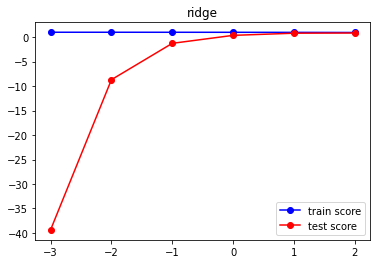

In [382]:
visualize_r2_score('ridge', X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.07349925623967, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.78694492238901, tolerance: 3.361037625329816
  positive)


[0.9883893111931599, 0.9642475843385514, 0.9040433148737358, 0.7830044022258924, 0.0, 0.0]
[0.5395711148323121, 0.8546579785014123, 0.8285164174616879, 0.7330690846654279, -0.03189647654769301, -0.03189647654769301]


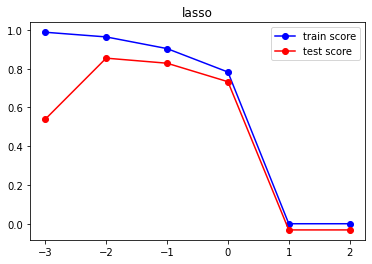

In [383]:
visualize_r2_score('lasso', X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273.0642995990199, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.4897911398928, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.28961526006583, tolerance: 3.361037625329816
  positive)


[0.9874783086501053, 0.969530717364987, 0.9236005696172338, 0.8094624207625649, 0.2948342126309522, 0.0]
[0.5852084758373108, 0.8437857533146446, 0.8410760810160732, 0.7501137987720841, 0.27360860460896363, -0.03189647654769301]


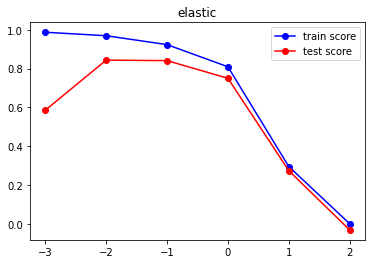

In [384]:
visualize_r2_score('elastic', X_train, y_train, X_test, y_test)

**Summary of ridge, lasso, elastic:**

전반적으로 lasso와 elaastic 측정기에서 alpha 0.1~0 에서 성능 높은 편.

ridge는 score 값이 0 이하에 머뭄

---

# 2. Breast Cancer 분류 분석

## Data import

In [385]:
breast = load_breast_cancer()

In [386]:
breast.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [387]:
X = breast['data']

In [388]:
X.shape

(569, 30)

In [389]:
breast['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [390]:
y = breast['target']

In [391]:
y.shape

(569,)

In [392]:
np.unique(y_train, return_counts=True)

(array([ 5. ,  5.6,  6.3,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,  8.8,
         9.5, 10.2, 10.4, 10.5, 10.9, 11. , 11.3, 11.5, 11.7, 11.8, 11.9,
        12.1, 12.3, 12.5, 12.6, 12.7, 12.8, 13. , 13.1, 13.2, 13.3, 13.4,
        13.5, 13.6, 13.8, 13.9, 14.1, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9,
        15. , 15.2, 15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.5,
        16.6, 16.7, 16.8, 17. , 17.1, 17.3, 17.4, 17.5, 17.7, 17.8, 18. ,
        18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
        19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2,
        20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 21. , 21.1, 21.2, 21.4, 21.5,
        21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4, 22.5, 22.6,
        22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7,
        23.8, 23.9, 24. , 24.1, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 25. ,
        25.1, 26.2, 26.4, 26.6, 26.7, 27. , 27.1, 27.5, 27.9, 28. , 28.1,
        28.4, 28.6, 28.7, 29. , 29.1, 

In [393]:
np.unique(y_test, return_counts=True)

(array([ 5. ,  7. ,  8.7,  8.8,  9.6,  9.7, 10.2, 10.4, 10.8, 10.9, 11.7,
        12. , 12.7, 13.1, 13.4, 13.6, 13.8, 13.9, 14. , 14.1, 14.2, 14.9,
        15. , 15.1, 15.2, 16.1, 16.4, 16.8, 17.1, 17.2, 17.4, 17.6, 17.8,
        17.9, 18.2, 18.3, 18.4, 18.5, 18.8, 18.9, 19.1, 19.2, 19.4, 19.5,
        19.6, 19.7, 19.9, 20. , 20.1, 20.2, 20.3, 20.4, 20.6, 20.7, 20.8,
        20.9, 21.1, 21.2, 21.4, 21.5, 21.7, 21.8, 22.4, 22.5, 22.6, 22.8,
        23. , 23.1, 23.2, 23.4, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2,
        24.4, 24.6, 24.7, 24.8, 25. , 25.2, 25.3, 26.5, 27.5, 28.2, 28.5,
        29. , 29.1, 29.8, 30.8, 31.5, 31.6, 32.4, 34.7, 35.4, 36.2, 39.8,
        43.5, 48.5, 50. ]),
 array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1,
        2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1,
        1,

In [394]:
df_x = pd.DataFrame(data=X, columns=breast['feature_names'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_x, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [395]:
df.shape

(569, 31)

In [396]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


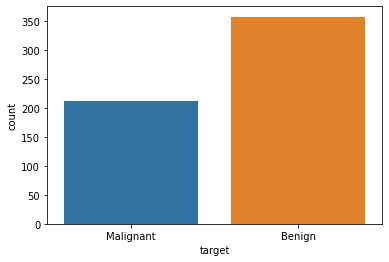

In [397]:
df['target'] = df['target'].map({0:'Malignant', 1:'Benign'}) 
sns.countplot(df['target'])
plt.show()

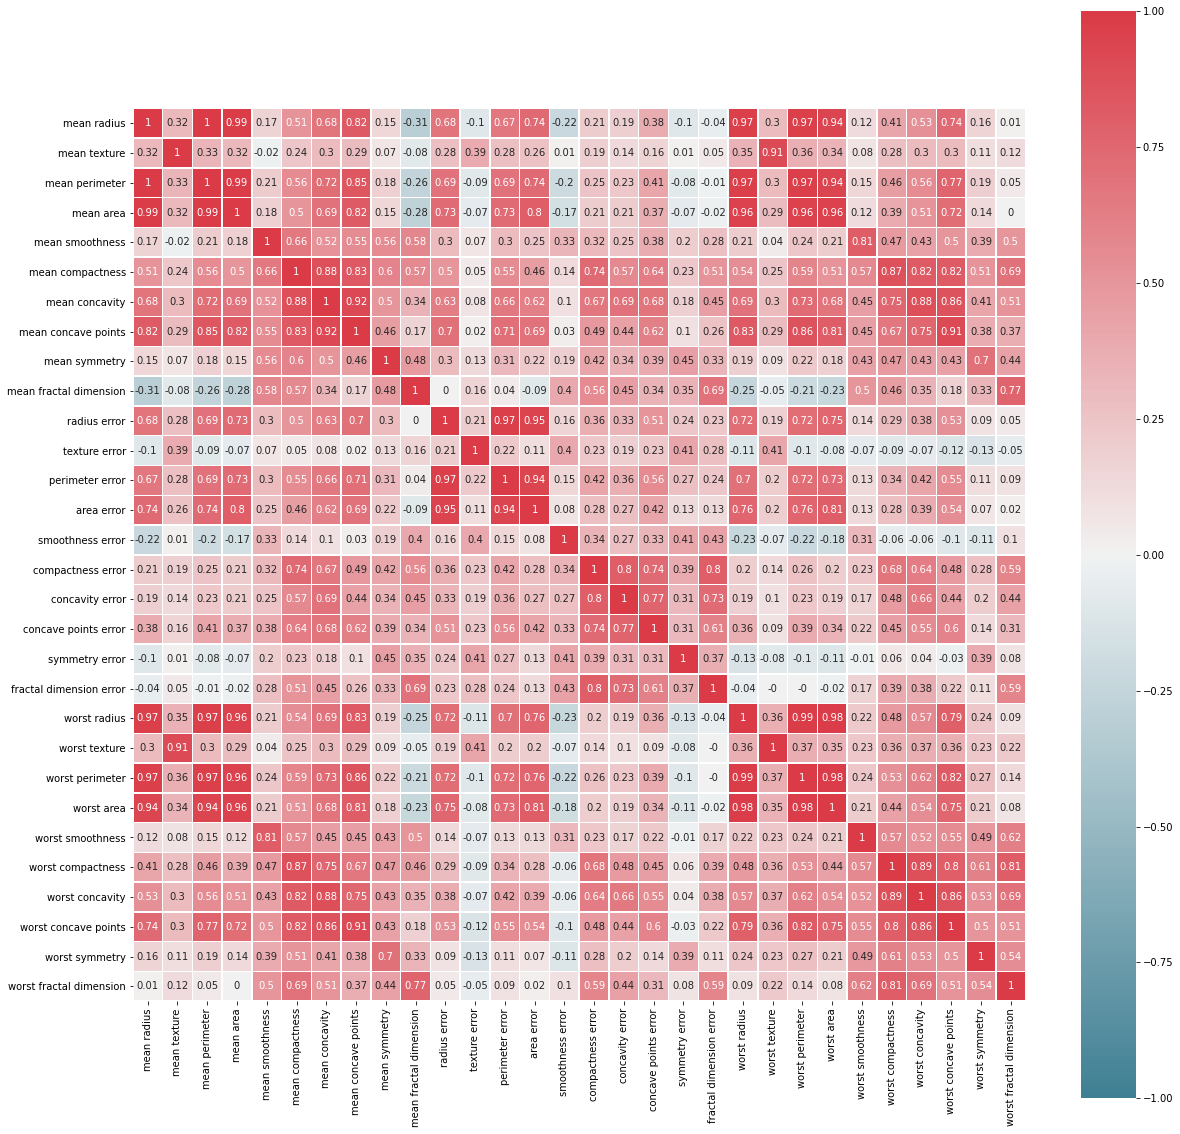

In [398]:
corr = df.corr().round(2)

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, annot=True)

plt.show()

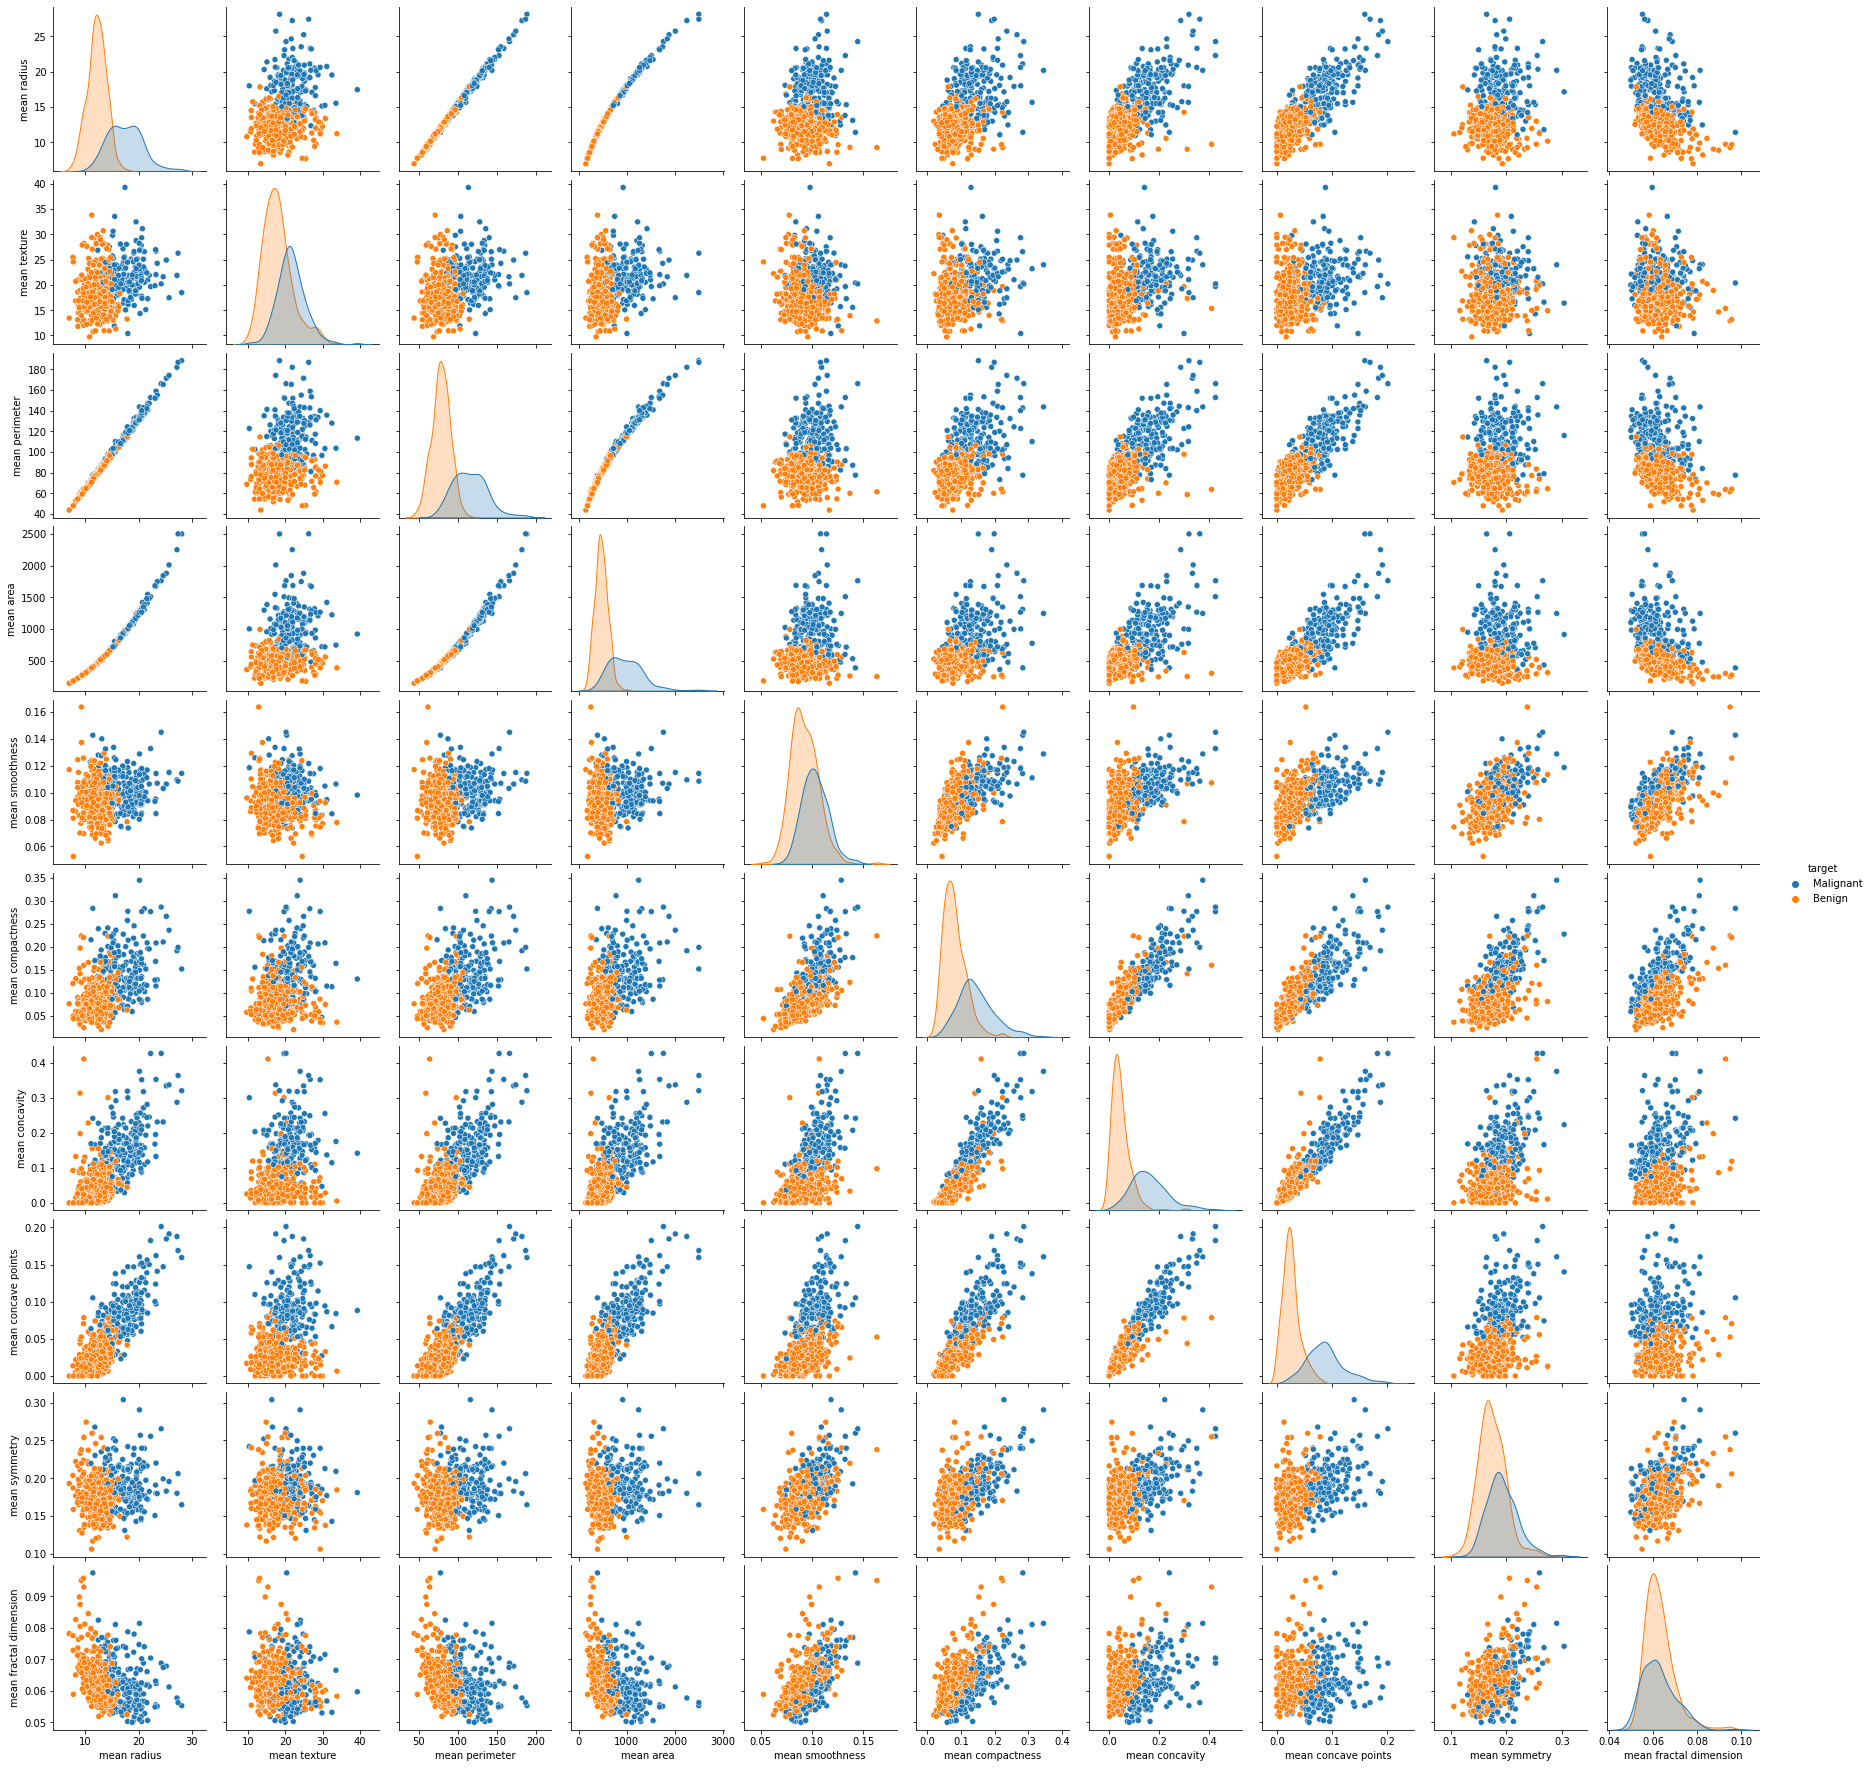

In [399]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'target']
sns.pairplot(data=df[cols], hue='target')
plt.show()

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # 테스트 셋의 비율(0 ~ 1)
                                                    stratify=y, # stratified sampling 기준이 되는 배열
                                                    random_state=1) # 난수 seed

## KNeighborsClassifier

In [401]:
knn_clf = KNeighborsClassifier()

In [402]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [403]:
knn_clf.score(X_train, y_train)

0.9522613065326633

In [404]:
knn_clf.score(X_test, y_test)

0.9298245614035088

In [405]:
test_pred = knn_clf.predict(X_test)

In [406]:
test_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [407]:
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[ 57,   7],
       [  5, 102]])

In [408]:
clf_report = classification_report(y_test, test_pred, 
                                   labels=[0, 1],
                                   target_names=['Malignant', 'Benign'])
print(clf_report)

              precision    recall  f1-score   support

   Malignant       0.92      0.89      0.90        64
      Benign       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



k 변화에 따른 성능 평가

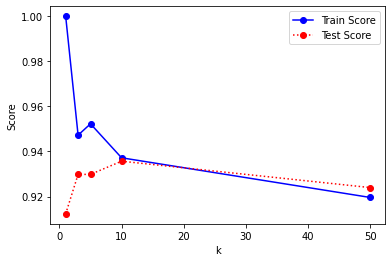

In [409]:
ks = (1, 3, 5, 10, 50)  # kNN에서 사용할 k 값
train_scores = []  # 학습 셋의 점수(정확도)를 저장할 리스트 
test_scores = []   # 테스트 셋의 점수(정확도)를 저장할 리스트 
for k in ks: 
    knn_clf = KNeighborsClassifier(n_neighbors=k)  # 모델 생성 
    knn_clf.fit(X_train, y_train)  # 모델 훈련 
    tr_score = knn_clf.score(X_train, y_train)  # 훈련 셋 점수 
    train_scores.append(tr_score)
    te_score = knn_clf.score(X_test, y_test)    # 테스트 셋 점수
    test_scores.append(te_score)

plt.plot(ks, train_scores, 'bo-', label='Train Score')
plt.plot(ks, test_scores, 'ro:', label='Test Score')

plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

## LogisticRegression

In [410]:
logi = LogisticRegression()

In [411]:
logi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [412]:
logi.score(X_train, y_train)

0.9422110552763819

In [413]:
logi.score(X_test, y_test)

0.935672514619883

In [414]:
test_pred = logi.predict(X_test)

In [415]:
test_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [416]:
confusion_matrix(y_test, test_pred)

array([[ 58,   6],
       [  5, 102]])

In [417]:
clf_report = classification_report(y_test, test_pred, 
                                   labels=[0, 1],
                                   target_names=['Malignant', 'Benign'])
print(clf_report)

              precision    recall  f1-score   support

   Malignant       0.92      0.91      0.91        64
      Benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## SGDClassifier

In [418]:
sgd = SGDClassifier()

In [419]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [420]:
sgd.score(X_train, y_train)

0.8969849246231156

In [421]:
sgd.score(X_test, y_test)

0.9122807017543859

In [422]:
test_red = sgd.predict(X_test)

In [423]:
test_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [424]:
confusion_matrix(y_test, test_pred)

array([[ 58,   6],
       [  5, 102]])

In [425]:
clf_report = classification_report(y_test, test_pred, 
                                   labels=[0, 1],
                                   target_names=['Malignant', 'Benign'])
print(clf_report)

              precision    recall  f1-score   support

   Malignant       0.92      0.91      0.91        64
      Benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## DecisionTreeClassifier

In [426]:
tree = DecisionTreeClassifier()

In [427]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [428]:
tree.score(X_train, y_train)

1.0

In [429]:
tree.score(X_test, y_test)

0.9532163742690059

In [430]:
test_pred = tree.predict(X_test)

In [431]:
test_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [432]:
confusion_matrix(y_test, test_pred)

array([[ 60,   4],
       [  4, 103]])

In [433]:
clf_report = classification_report(y_test, test_pred, 
                                   labels=[0, 1],
                                   target_names=['Malignant', 'Benign'])
print(clf_report)

              precision    recall  f1-score   support

   Malignant       0.94      0.94      0.94        64
      Benign       0.96      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



**summary of classification:** 

세부 수치를 조정하지 않았을 때 전반적으로 4가지 측정기의 성능이 비슷하게 나타남
* accuracy : 95%
* recall : 94%
* precision : 94%

---

## 변수 조정 후 모델링

worst 변수를 제외하고 돌려봄

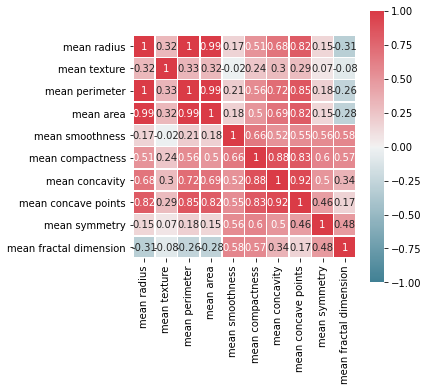

In [434]:
corr = df[cols].corr().round(2)

f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, annot=True)

plt.show()

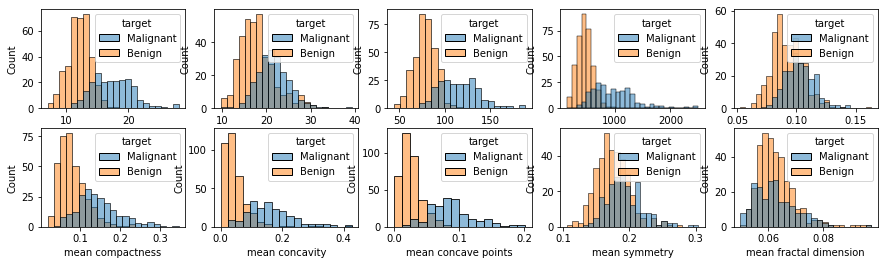

In [435]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15, 4))
variables = df.columns[:10]
for x, var in enumerate(variables[0:5]): 
    sns.histplot(df, x=var, ax=axes[0, x], hue='target')
for x, var in enumerate(variables[5:10]): 
    sns.histplot(df, x=var, ax=axes[1, x], hue='target')

plt.show()

In [436]:
X_rev = X[:, :10]

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X_rev, y,
                                                    test_size=0.3,  # 테스트 셋의 비율(0 ~ 1)
                                                    stratify=y, # stratified sampling 기준이 되는 배열
                                                    random_state=1) # 난수 seed

In [438]:
def clf_model(estimator, X_train, y_train, X_test, y_test): 
    if estimator == 'knn':
        model = KNeighborsClassifier()
    elif estimator == 'logi':
        model = LogisticRegression()
    elif estimator == 'sgd':
        model = SGDClassifier()
    elif estimator == 'tree':
        model = DecisionTreeClassifier()
    else: 
        raise ValueError('estimator는 "knn", "logi", "sgd", "tree"이어야 함')

    model.fit(X_train, y_train)
    train_sc = model.score(X_train, y_train)
    test_sc = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, test_pred)
    clf_report = classification_report(y_test, test_pred, 
                                    labels=[0, 1],
                                    target_names=['Malignant', 'Benign'])
    print(f'Train Score: {train_sc}\n')
    print(f'Test Score: {test_sc}\n')
    print(f'Confusion matrix: \n{conf_matrix}\n')
    print(f'Report: {clf_report}\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


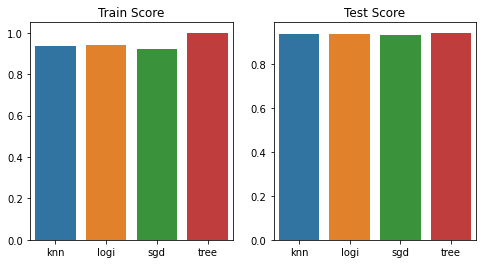

In [444]:
method = []
train_score = []
test_score = []
models = ['knn', 'logi', 'sgd', 'tree']
for m in models:
        if m == 'knn':
            model = KNeighborsClassifier(n_neighbors=10)
        elif m == 'logi':
            model = LogisticRegression()
        elif m == 'sgd':
            model = SGDClassifier()
        elif m == 'tree':
            model = DecisionTreeClassifier()
        else: 
            raise ValueError('estimator는 "knn", "logi", "sgd", "tree"이어야 함')

        model.fit(X_train, y_train)
        train_sc = model.score(X_train, y_train)
        test_sc = model.score(X_test, y_test)
        test_pred = model.predict(X_test)
        conf_matrix = confusion_matrix(y_test, test_pred)
        clf_report = classification_report(y_test, test_pred, 
                                        labels=[0, 1],
                                        target_names=['Malignant', 'Benign'])
        method.append(m)
        train_score. append(train_sc)
        test_score.append(test_sc)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(x=method, y=train_score, ax=ax[0])
ax[0].set_title('Train Score')
sns.barplot(x=method, y=test_score, ax=ax[1])
ax[1].set_title('Test Score')
plt.show()

In [440]:
models = ['knn', 'logi', 'sgd', 'tree']

for model in models:
    print(model, '---'*20)
    clf_model(model, X_train, y_train, X_test, y_test)
    print('\n')

knn ------------------------------------------------------------
Train Score: 0.914572864321608

Test Score: 0.8830409356725146

Confusion matrix: 
[[ 51  13]
 [  7 100]]

Report:               precision    recall  f1-score   support

   Malignant       0.88      0.80      0.84        64
      Benign       0.88      0.93      0.91       107

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171




logi ------------------------------------------------------------
Train Score: 0.9170854271356784

Test Score: 0.9064327485380117

Confusion matrix: 
[[56  8]
 [ 8 99]]

Report:               precision    recall  f1-score   support

   Malignant       0.88      0.88      0.88        64
      Benign       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


변수 조정 후 Tree 모델의 재현율(recall)이 95%까지 올라감.